In [1]:
import json
import glob
import re
import matplotlib.pyplot as plt

In [ ]:
use_memory_efficient = False  # Set to True if using memory-efficient sharding

In [ ]:
# Path to results folder
if use_memory_efficient:
    path = "./results/rmse_results_inmem_np*.json"
else:
    path = "./results/rmse_results_memeff_np*.json"

processes = []
times = []

# Iterate through all JSON files
for file in glob.glob(path):
    # Extract number of processes from filename (e.g. np4 -> 4)
    match = re.search(r'np(\d+)', file)
    if match:
        np = int(match.group(1))
        with open(file, "r") as f:
            data = json.load(f)
            training_time = data.get("training_time_seconds", None)
            if training_time is not None:
                processes.append(np)
                times.append(training_time)

# Sort by number of processes
processes, times = zip(*sorted(zip(processes, times)))


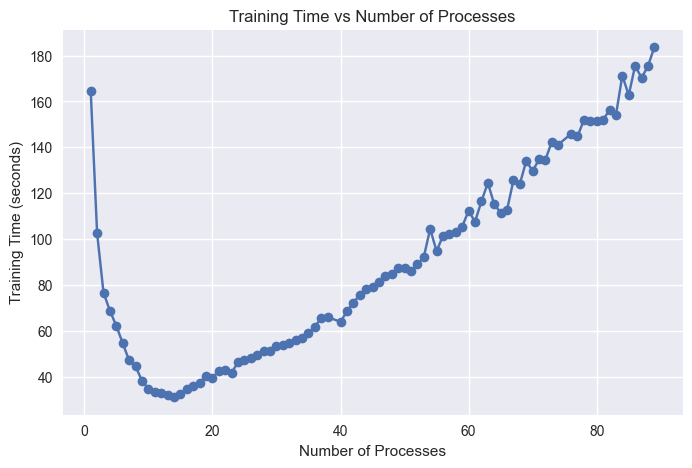

<Figure size 800x550 with 0 Axes>

In [18]:
# Plot
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(8, 5))
plt.plot(processes, times, marker="o", linestyle="-", label="Training Time")
plt.xlabel("Number of Processes")
plt.ylabel("Training Time (seconds)")
plt.title("Training Time vs Number of Processes")
plt.grid(True)
plt.show()

# save plot
plt.savefig("process_time_plot.png")

In [19]:
# find optimal processes with minimum time
min_time = min(times)
min_index = times.index(min_time)
print(f"Minimum training time: {min_time} seconds with {processes[min_index]} processes")

Minimum training time: 31.076024770736694 seconds with 14 processes
